In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10,10
import statsmodels.api as sm

In [3]:
dataset = pd.read_csv(r"E:\data\ap.csv")
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataset = dataset.set_index('Month')

In [4]:
from datetime import datetime
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


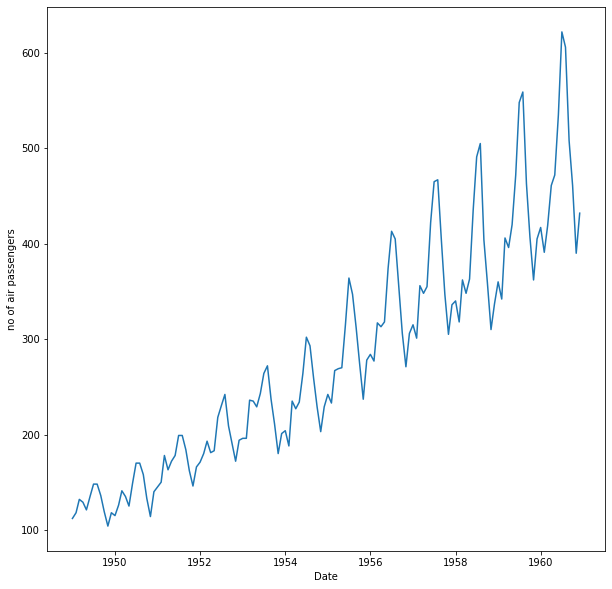

In [5]:
plt.xlabel("Date")
plt.ylabel("no of air passengers")
plt.plot(indexedDataset)

In [6]:
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

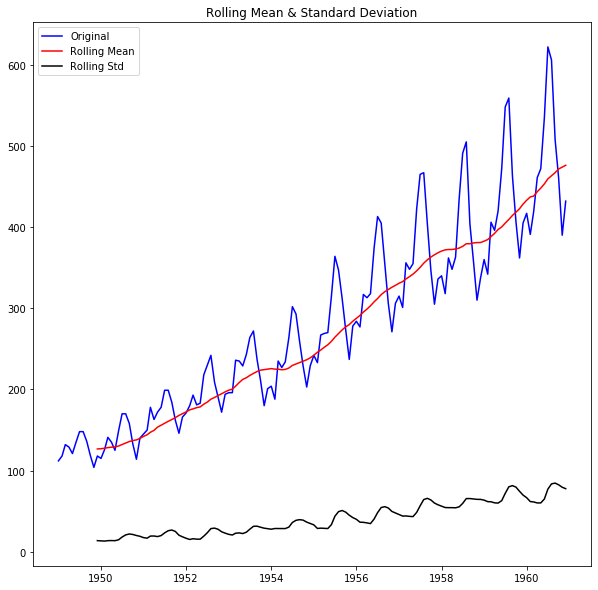

In [7]:
org = plt.plot(indexedDataset, color = 'blue', label='Original')
mean =plt.plot(rolmean, color ='red', label= 'Rolling Mean')
std = plt.plot(rolstd, color ='black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')

            #Passengers
Month                  
1949-01-01     4.718499
1949-02-01     4.770685
1949-03-01     4.882802
1949-04-01     4.859812
1949-05-01     4.795791


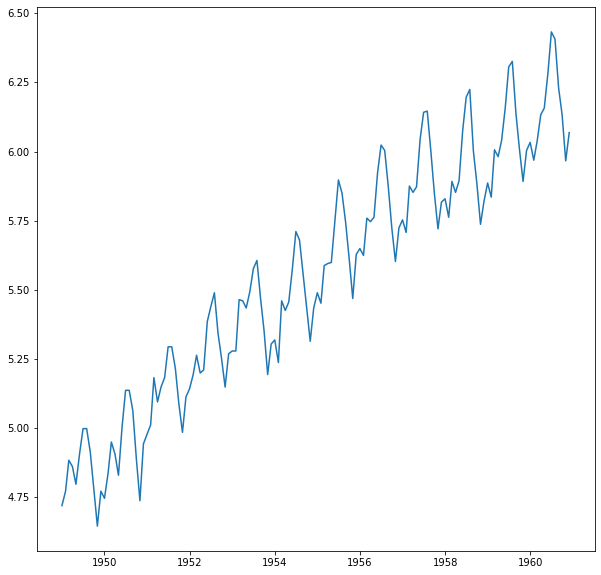

In [8]:
indexedDataset_logScale = np.log(indexedDataset)
print(indexedDataset_logScale.head())
plt.plot(indexedDataset_logScale)

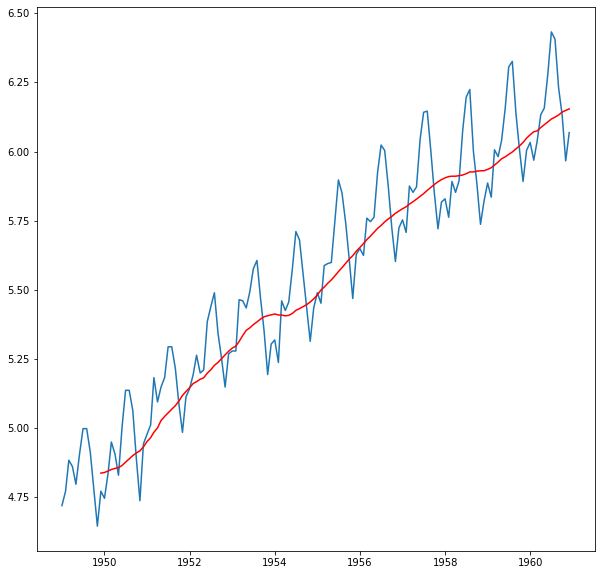

In [9]:
movingAvg = indexedDataset_logScale.rolling(window=12).mean()
movingStd = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAvg, color='red')

In [10]:
df = indexedDataset_logScale - movingAvg
df.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [11]:
df1=df.copy()

In [12]:
df1

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [13]:
df.dropna(inplace=True)
df.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
      
        movingAvg = timeseries.rolling(window=12).mean()
        movingStd = timeseries.rolling(window=12).std()
        
        org = plt.plot(timeseries, color = 'blue', label='Original')
        mean =plt.plot(movingAvg, color ='red', label= 'Rolling Mean')
        std = plt.plot(movingStd, color ='black', label = 'Rolling Std')
        plt.legend(loc = 'best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show(block=False)
        
        
        print("result of DCF Test")
        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index = ['Text Statistic', 'p-value', '#Lags Used','Number of observations'])
        
        for key, value in dftest[4].items():
            dfoutput['Critical value(%s)'%key] = value
        print(dfoutput)

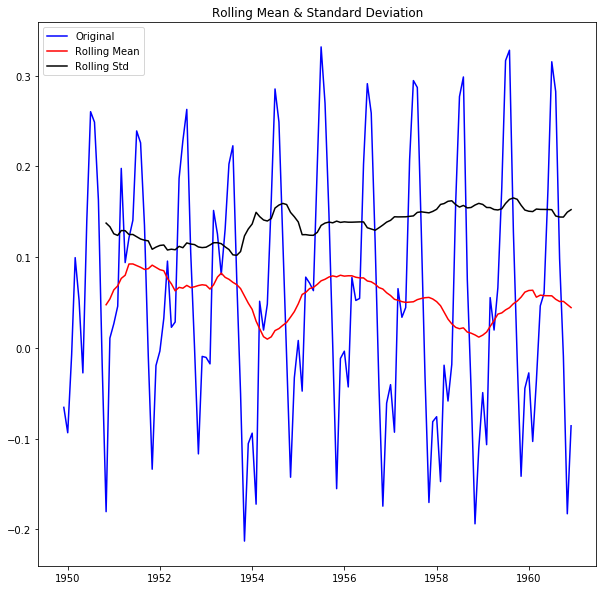

result of DCF Test
Text Statistic             -3.162908
p-value                     0.022235
#Lags Used                 13.000000
Number of observations    119.000000
Critical value(1%)         -3.486535
Critical value(5%)         -2.886151
Critical value(10%)        -2.579896
dtype: float64


In [15]:
test_stationarity(df)

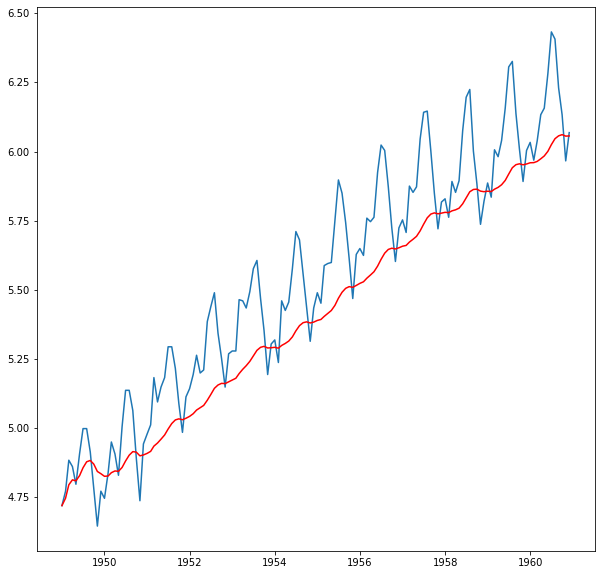

In [16]:
weightedAvg= indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(weightedAvg, color='red')

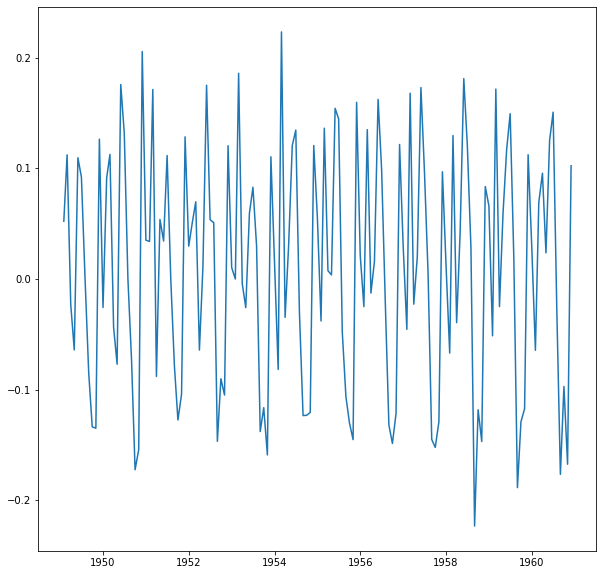

In [17]:
datasetLogDiffShifting = indexedDataset_logScale -  indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

            #Passengers
Month                  
1949-02-01     0.052186
1949-03-01     0.112117
1949-04-01    -0.022990
1949-05-01    -0.064022
1949-06-01     0.109484
...                 ...
1960-08-01    -0.026060
1960-09-01    -0.176399
1960-10-01    -0.097083
1960-11-01    -0.167251
1960-12-01     0.102279

[143 rows x 1 columns]


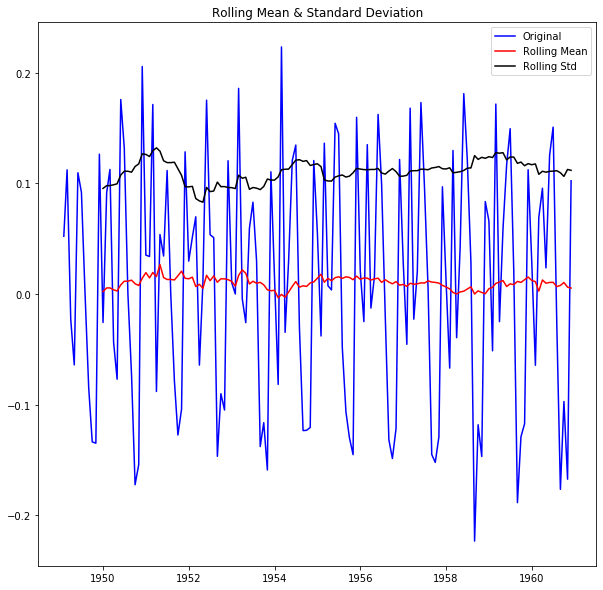

result of DCF Test
Text Statistic             -2.717131
p-value                     0.071121
#Lags Used                 14.000000
Number of observations    128.000000
Critical value(1%)         -3.482501
Critical value(5%)         -2.884398
Critical value(10%)        -2.578960
dtype: float64


In [18]:
datasetLogDiffShifting.dropna(inplace=True)
print(datasetLogDiffShifting)
test_stationarity(datasetLogDiffShifting)

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64


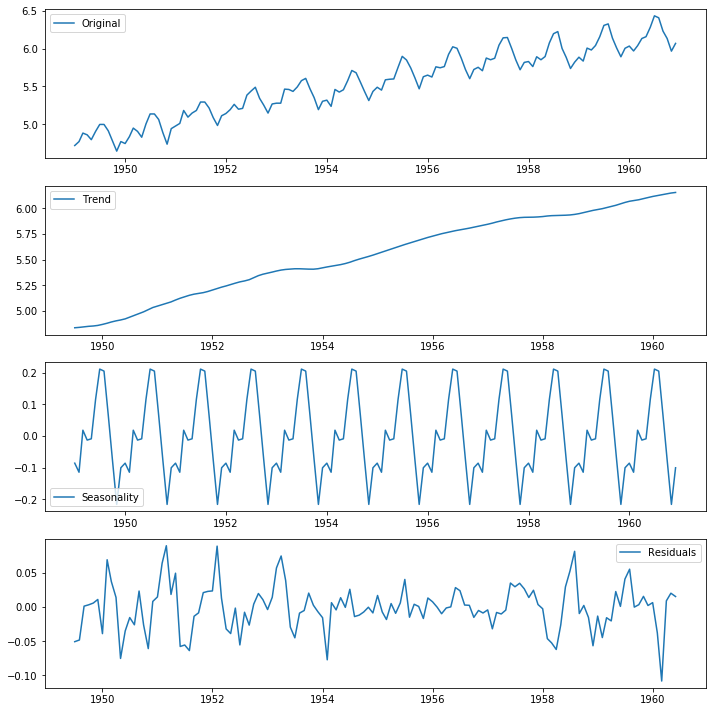

In [19]:
decomposition = sm.tsa.seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
print(residual)
plt.subplot(411)
plt.plot(indexedDataset_logScale, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = "Trend")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = "Seasonality")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = "Residuals")
plt.legend(loc='best')
plt.tight_layout()

Month
1949-07-01   -0.050884
1949-08-01   -0.048415
1949-09-01    0.001223
1949-10-01    0.003156
1949-11-01    0.005749
                ...   
1960-02-01   -0.038032
1960-03-01   -0.108624
1960-04-01    0.009006
1960-05-01    0.020213
1960-06-01    0.015348
Name: resid, Length: 132, dtype: float64


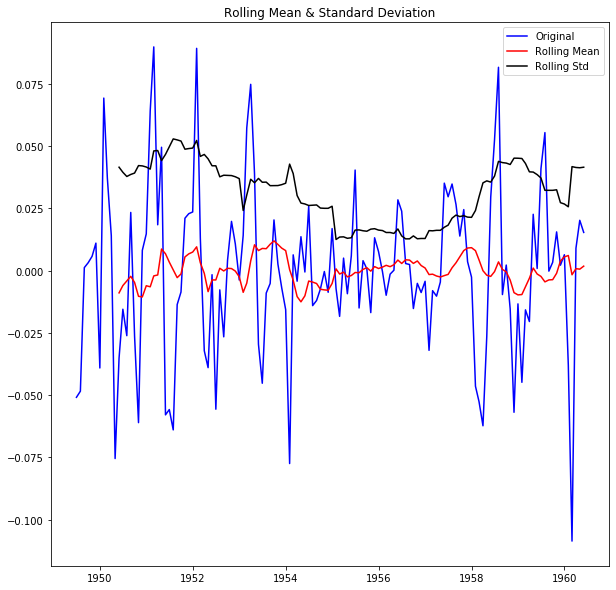

result of DCF Test
Text Statistic           -6.332387e+00
p-value                   2.885059e-08
#Lags Used                9.000000e+00
Number of observations    1.220000e+02
Critical value(1%)       -3.485122e+00
Critical value(5%)       -2.885538e+00
Critical value(10%)      -2.579569e+00
dtype: float64


In [20]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
print(decomposedLogData)
test_stationarity(decomposedLogData)


In [21]:
decomposedLogData


Month
1949-07-01   -0.050884
1949-08-01   -0.048415
1949-09-01    0.001223
1949-10-01    0.003156
1949-11-01    0.005749
                ...   
1960-02-01   -0.038032
1960-03-01   -0.108624
1960-04-01    0.009006
1960-05-01    0.020213
1960-06-01    0.015348
Name: resid, Length: 132, dtype: float64

In [22]:
print(seasonal)

Month
1949-01-01   -0.085815
1949-02-01   -0.114413
1949-03-01    0.018113
1949-04-01   -0.013046
1949-05-01   -0.008966
                ...   
1960-08-01    0.204512
1960-09-01    0.064836
1960-10-01   -0.075271
1960-11-01   -0.215846
1960-12-01   -0.100315
Name: seasonal, Length: 144, dtype: float64


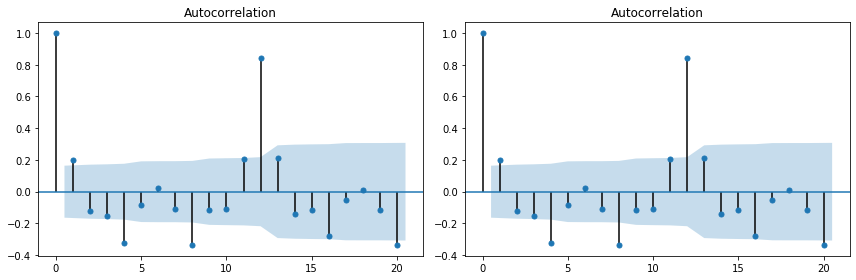

In [23]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.api as smt
fig, axes = plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(datasetLogDiffShifting,lags=20,ax=axes[0])
smt.graphics.plot_acf(datasetLogDiffShifting,lags=20,ax=axes[1])
plt.tight_layout()

C:\Users\Anish Si\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Anish Si\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


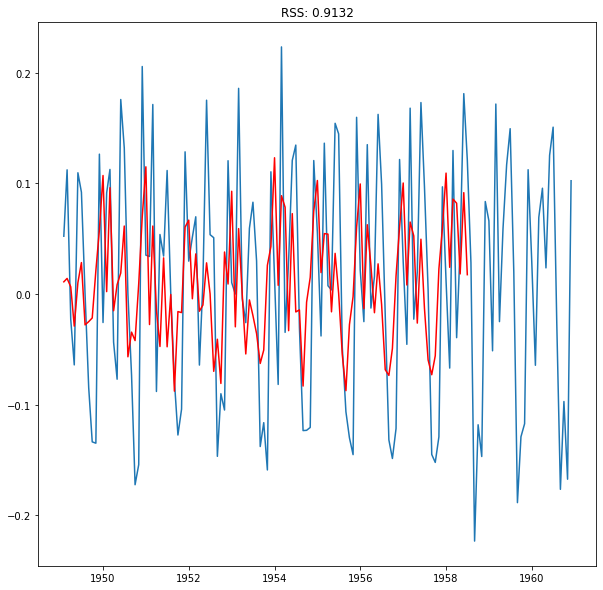

In [24]:
from statsmodels.tsa.arima_model import ARIMA
train = indexedDataset_logScale[0:int(len(indexedDataset_logScale)*0.80)]
test = indexedDataset_logScale[int(len(indexedDataset_logScale)*0.80):]
train_log_shift = datasetLogDiffShifting[0:int(len(datasetLogDiffShifting)*0.80)]
test_log_shift = datasetLogDiffShifting[int(len(datasetLogDiffShifting)*0.80):]
model= ARIMA(train, order= (2, 1, 2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - train_log_shift['#Passengers'])**2))
print('Plotting AR model')

C:\Users\Anish Si\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Anish Si\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA model


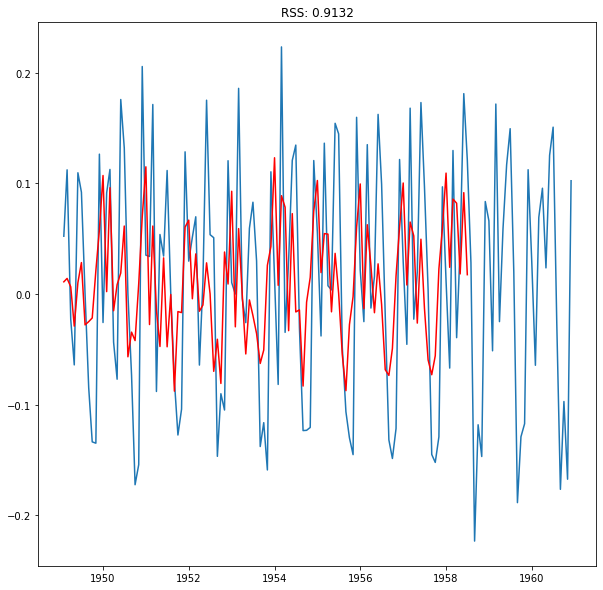

In [25]:
model1= ARIMA(train, order= (2, 1, 2))
results_MA = model1.fit(disp =-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - train_log_shift['#Passengers'])**2))

print('Plotting MA model')

C:\Users\Anish Si\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Anish Si\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Anish Si\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Anish Si\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Month
1949-02-01    0.009873
1949-03-01    0.019825
1949-04-01    0.030470
1949-05-01   -0.019099
1949-06-01   -0.012135
dtype: float64
Plotting ARIMA model
29


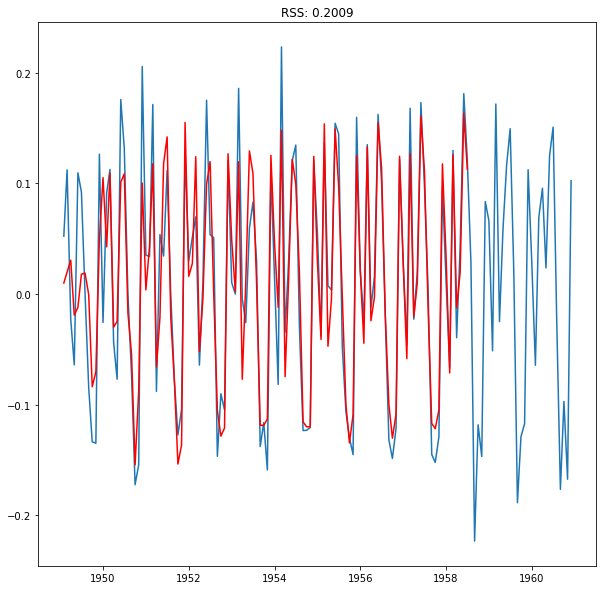

In [26]:
model2= ARIMA(train, order= (10, 1, 10))
results_ARIMA = model2.fit(disp =-1)
plt.plot(datasetLogDiffShifting)
print(results_ARIMA.fittedvalues.head())
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - train_log_shift['#Passengers'])**2))
print('Plotting ARIMA model')
print(len(test))
x=results_ARIMA.forecast(steps= len(test))[0]


In [27]:
x

array([6.18325489, 6.05907416, 5.93968312, 5.83977261, 5.95068721,
       5.98120612, 5.89966009, 6.01608831, 6.01056846, 6.03088997,
       6.20519662, 6.31646014, 6.30114269, 6.17776182, 6.05948659,
       5.96938606, 6.07373966, 6.10560387, 6.01288073, 6.12015978,
       6.12587393, 6.14503011, 6.32682552, 6.43647441, 6.41805993,
       6.29661432, 6.17964133, 6.09912358, 6.1974422 ])

In [28]:
test

,#Passengers
Month,
1958-08-01,6.224558
1958-09-01,6.001415
1958-10-01,5.883322
1958-11-01,5.736572
1958-12-01,5.820083
1959-01-01,5.886104
1959-02-01,5.834811
1959-03-01,6.006353
1959-04-01,5.981414


In [29]:
predictions_ARIMA_diff = pd.Series(x, copy=True)

test1=test.replace(to_replace = test[['#Passengers']], value =predictions_ARIMA_diff, inplace=True) 

In [30]:
test1=test.copy()

In [31]:
test1['#Passengers']=x

In [32]:
predictions_ARIMA_diff=pd.Series(test1['#Passengers'], copy=True)

print(predictions_ARIMA_diff.head())

Month
1958-08-01    6.183255
1958-09-01    6.059074
1958-10-01    5.939683
1958-11-01    5.839773
1958-12-01    5.950687
Name: #Passengers, dtype: float64


In [33]:
take1=dataset[int(len(indexedDataset_logScale)*0.80):]

In [34]:
y=take1['#Passengers'].array

In [35]:
y

<PandasArray>
[505, 404, 359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
 362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432]
Length: 29, dtype: int64

In [36]:
x1=np.exp(x)

In [37]:
x1

array([484.56660341, 427.97901384, 379.81455467, 343.70117751,
       384.01714939, 395.9176041 , 364.91341024, 409.97177182,
       407.71502422, 416.08516724, 495.31633746, 553.60981796,
       545.19454451, 481.91214245, 428.15556227, 391.26538292,
       434.30178822, 448.36331265, 408.65886154, 454.93737895,
       457.5444008 , 466.39369209, 559.37803811, 624.20223439,
       612.81305946, 542.7312792 , 482.81875424, 445.46718394,
       491.49029861])

In [38]:
predictions_ARIMA = test1.copy()

In [39]:
predictions_ARIMA['#Passengers']=x1

            #Passengers
Month                  
1958-08-01   484.566603
1958-09-01   427.979014
1958-10-01   379.814555
1958-11-01   343.701178
1958-12-01   384.017149
1959-01-01   395.917604
1959-02-01   364.913410
1959-03-01   409.971772
1959-04-01   407.715024
1959-05-01   416.085167
1959-06-01   495.316337
1959-07-01   553.609818
1959-08-01   545.194545
1959-09-01   481.912142
1959-10-01   428.155562
1959-11-01   391.265383
1959-12-01   434.301788
1960-01-01   448.363313
1960-02-01   408.658862
1960-03-01   454.937379
1960-04-01   457.544401
1960-05-01   466.393692
1960-06-01   559.378038
1960-07-01   624.202234
1960-08-01   612.813059
1960-09-01   542.731279
1960-10-01   482.818754
1960-11-01   445.467184
1960-12-01   491.490299


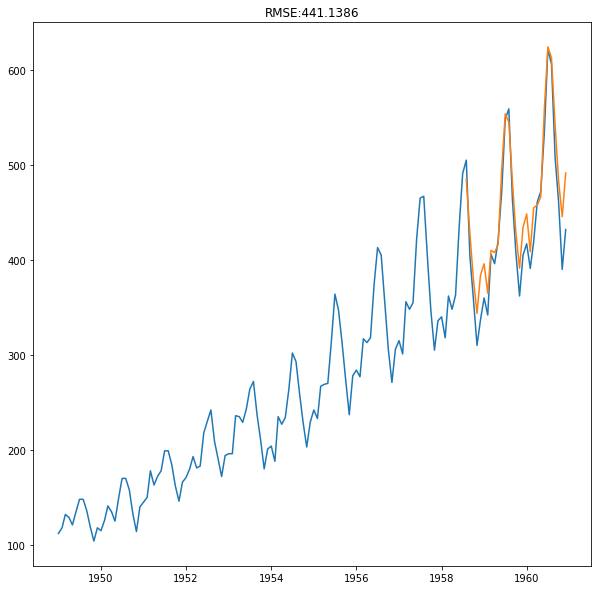

In [40]:
predictions_ARIMA 
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.title('RMSE:%.4f'% np.sqrt(sum((y - x)**2)/len(x)))
print(predictions_ARIMA)

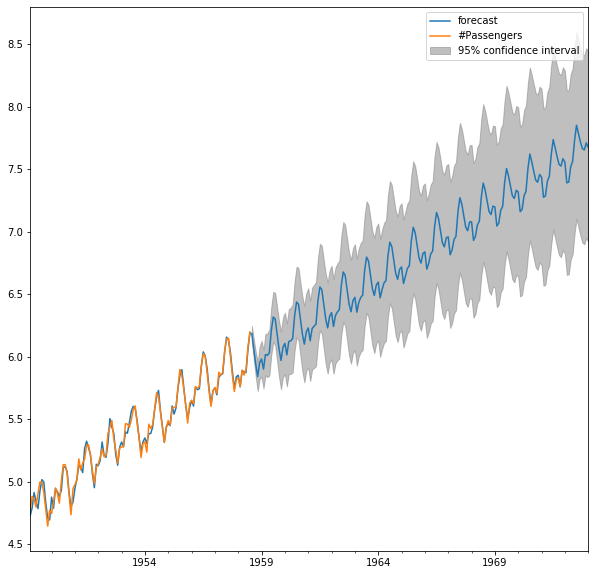

In [41]:
results_ARIMA.plot_predict(1,288)
x= results_ARIMA.forecast(steps=144)